In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pyfits
from collections import OrderedDict
%matplotlib inline

/Users/KimiZ/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
filename1 = "chains-1-grbm+lpow.fit"
filename2 = "chains-2-grbm+lpow.fit"
filename3 = "chains-3-grbm+lpow.fit"

In [3]:
f1 = pyfits.open(filename1)
f2 = pyfits.open(filename2)
f3 = pyfits.open(filename3)

In [4]:
f1.info(), f2.info(), f3.info()

Filename: chains-1-grbm+lpow.fit
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   ()              
1    CHAIN       BinTableHDU    123   10000R x 7C   [D, D, D, D, D, D, D]   
Filename: chains-2-grbm+lpow.fit
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   ()              
1    CHAIN       BinTableHDU    123   5500R x 7C   [D, D, D, D, D, D, D]   
Filename: chains-3-grbm+lpow.fit
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   ()              
1    CHAIN       BinTableHDU    123   5500R x 7C   [D, D, D, D, D, D, D]   


(None, None, None)

## I will show you only one of the chain files.

In [5]:
PRIMARY = f1[0] # primary header
CHAIN = f1[1] # CHAIN

In [6]:
PRIMARY.header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 

In [7]:
CHAIN.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   56 / width of table in bytes                        
NAXIS2  =                10000 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    7 / number of fields in each row                   
TTYPE1  = 'alpha__1'           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE2  = 'beta__2 '           / label for field   2                            
TFORM2  = 'D       '           / data format of field: 8-byte DOUBLE            
TTYPE3  = 'tem__3  '        

In [8]:
CHAIN.header["NWALKERS"]

10

In [9]:
CHAIN.data

rec.array([ (-0.69709466520958785, -2.1828383302169319, 282.78793454990284, 0.019208871532531004, -1.988220263782126, 0.0013228142131800494, 307.98983619806626),
 (-0.6999171373978057, -2.1741757205452759, 278.69173702035073, 0.019396374251436234, -2.0301681251533474, 0.0012028009668003231, 308.13215796337852),
 (-0.80907008479682618, -2.1704840532169838, 331.07680054126155, 0.018763763980344857, -2.0852560738775416, 0.00086087812861039125, 310.95785687055138),
 ...,
 (-0.80898242756954797, -0.80898242756954797, 10.0, 1.0618360240418318e-15, -0.80898242756954797, 1.0618360240418318e-15, 19954.197440469281),
 (-0.82750280362388562, -2.1972175419303888, 372.20899672258031, 0.017425682276170012, -2.0608615755114923, 0.00098948630452283417, 314.01759527913265),
 (-0.88805011441144033, -2.1967182442745878, 377.5991850432282, 0.018426211934295909, -1.9309652676518487, 0.00068533155644200777, 315.39718374293585)], 
          dtype=[('alpha__1', '>f8'), ('beta__2', '>f8'), ('tem__3', '>f8'), (

In [10]:
CHAIN.data.columns

ColDefs(
    name = 'alpha__1'; format = 'D'
    name = 'beta__2'; format = 'D'
    name = 'tem__3'; format = 'D'; unit = 'keV'
    name = 'norm__4'; format = 'D'
    name = 'plIndex__5'; format = 'D'; unit = 'NONE'
    name = 'norm__6'; format = 'D'
    name = 'FIT_STATISTIC'; format = 'D'; unit = 'C-Statistic'
)

In [11]:
CHAIN.data["alpha__1"]

array([-0.69709467, -0.69991714, -0.80907008, ..., -0.80898243,
       -0.8275028 , -0.88805011])

In [12]:
CHAIN.data["FIT_STATISTIC"]

array([   307.9898362 ,    308.13215796,    310.95785687, ...,
        19954.19744047,    314.01759528,    315.39718374])

In [13]:
BURN_LEN = CHAIN.header["COMMENT"][1].split("= "); BURN_LEN

['BURN LENGTH ', '2000']

In [14]:
BURN_NUM = float(BURN_LEN[1]); BURN_NUM

2000.0

In [15]:
CHAIN.name, CHAIN.size # size is not the number of chains.

('CHAIN', 560000)

In [16]:
len(CHAIN.data) # we made an MCMC chain with 10,000 runs.

10000

In [17]:
CHAIN.columns

ColDefs(
    name = 'alpha__1'; format = 'D'
    name = 'beta__2'; format = 'D'
    name = 'tem__3'; format = 'D'; unit = 'keV'
    name = 'norm__4'; format = 'D'
    name = 'plIndex__5'; format = 'D'; unit = 'NONE'
    name = 'norm__6'; format = 'D'
    name = 'FIT_STATISTIC'; format = 'D'; unit = 'C-Statistic'
)

### We assigned CHAIN to f1[1].  
### CHAIN.data and f1[1].data are the same.  
#### We shall confirm now that they are the same:

#### np.array_equiv(a1, a2)  
Returns True if input arrays a1 and a2 are shape consistent and all elements equal.
#### np.array_equal(a1, a2) 
Returns True if the arrays are equal.

In [18]:
np.array_equal(CHAIN.data, f1[1].data)

True

In [19]:
np.array_equal(CHAIN.data, f2[1].data) # f2 is a different data file.

False

In [20]:
np.array_equiv(CHAIN.data, f1[1].data), np.array_equiv(CHAIN.data, f2[1].data)

(True, False)

In [21]:
np.array_equiv(CHAIN.data, f2[1].data) # this is another input file.

False

### Take the chain data stored in the fits files and make pandas dataframes.

In [22]:
df_chains1 = pd.DataFrame(CHAIN.data) # f1[1].data works as well.
df_chains2 = pd.DataFrame(f2[1].data)
df_chains3 = pd.DataFrame(f3[1].data)

In [23]:
# df_chains1[df_chains1["FIT_STATISTIC"]>400.0]

### The data format of the CHAIN.data is little-endian, because that's what Fits files store the data as.  This will cause problems for the Pandas package, as well as many others.  If some of your pandas commands don't work and you get an error that says this:
    ValueError: Big-endian buffer not supported on little-endian compiler
### Then you need to convert the data to big-endian (float64).


In [24]:
df_chains1.dtypes

alpha__1         >f8
beta__2          >f8
tem__3           >f8
norm__4          >f8
plIndex__5       >f8
norm__6          >f8
FIT_STATISTIC    >f8
dtype: object

In [25]:
CHAIN.data.dtype

dtype((numpy.record, [('alpha__1', '>f8'), ('beta__2', '>f8'), ('tem__3', '>f8'), ('norm__4', '>f8'), ('plIndex__5', '>f8'), ('norm__6', '>f8'), ('FIT_STATISTIC', '>f8')]))

### Converting from little-endian format (f8) to big-endian (float64). 
This will cause issues with Pandas later if you don't do this now.  Pyfits uses little-endian format where most other programs use big-endian.

In [26]:
df_chains1 = df_chains1.astype('float64')
df_chains2 = df_chains2.astype('float64')
df_chains3 = df_chains3.astype('float64')

In [27]:
df_chains1.dtypes

alpha__1         float64
beta__2          float64
tem__3           float64
norm__4          float64
plIndex__5       float64
norm__6          float64
FIT_STATISTIC    float64
dtype: object

### Now we need to sort the data by the FIT_STATISTIC column and trim down the data to a subset of N datasets with the best (lowest) statistics.  This statistic is also known as the C-stat.

\*** In order to do this, we make a copy, newchain = oldchain.copy(), instead of using newchain = oldchain.  The latter method will cause changed to the old chain file when you edit the new one. 

In [28]:
Chain1 = df_chains1.copy()
Chain2 = df_chains2.copy()
Chain3 = df_chains3.copy()

#### Now we cant to sort all the chains by the FIT_STATISTIC with smallest values first.
These are the most likely parameters (i.e., have the greated log-likelihood) since log-likelihood = cstat/-2.

In [29]:
Chain1S = Chain1.sort_values(by="FIT_STATISTIC", ascending=True)
Chain2S = Chain2.sort_values(by="FIT_STATISTIC", ascending=True)
Chain3S = Chain3.sort_values(by="FIT_STATISTIC", ascending=True)

#### You will see that we sorted the data by the Fit Statistic, ascending in value.

In [30]:
Chain1S[0:10]

alpha__1   beta__2      tem__3   norm__4  plIndex__5   norm__6  \
380  -0.730139 -2.178759  293.871104  0.019258   -2.043611  0.001088   
2450 -0.739288 -2.183636  300.301886  0.019166   -2.037493  0.001061   
2460 -0.739288 -2.183636  300.301886  0.019166   -2.037493  0.001061   
2470 -0.739882 -2.184326  301.041748  0.019152   -2.037684  0.001061   
2420 -0.724329 -2.183355  293.736665  0.019229   -2.043159  0.001102   
2440 -0.724329 -2.183355  293.736665  0.019229   -2.043159  0.001102   
2430 -0.724329 -2.183355  293.736665  0.019229   -2.043159  0.001102   
9568 -0.735106 -2.179753  297.695453  0.019227   -2.061632  0.001058   
9558 -0.735106 -2.179753  297.695453  0.019227   -2.061632  0.001058   
559  -0.758979 -2.176577  304.240366  0.019200   -2.053504  0.000956   

      FIT_STATISTIC  
380      307.072973  
2450     307.169801  
2460     307.169801  
2470     307.197460  
2420     307.204598  
2440     307.204598  
2430     307.204598  
9568     307.206187  
9558     307.206187  
559      307.403383

In [31]:
Chain2S[0:10]

alpha__1   beta__2      tem__3   norm__4  plIndex__5   norm__6  \
4074 -0.755352 -2.182698  308.964302  0.018979   -2.048486  0.001002   
4084 -0.755352 -2.182698  308.964302  0.018979   -2.048486  0.001002   
4064 -0.755352 -2.182698  308.964302  0.018979   -2.048486  0.001002   
4034 -0.757615 -2.184045  310.543633  0.018951   -2.044415  0.001005   
4024 -0.757615 -2.184045  310.543633  0.018951   -2.044415  0.001005   
4044 -0.757615 -2.184045  310.543633  0.018951   -2.044415  0.001005   
4344 -0.753166 -2.181459  308.157810  0.018922   -2.035074  0.001032   
4364 -0.753166 -2.181459  308.157810  0.018922   -2.035074  0.001032   
4334 -0.753166 -2.181459  308.157810  0.018922   -2.035074  0.001032   
4354 -0.753166 -2.181459  308.157810  0.018922   -2.035074  0.001032   

      FIT_STATISTIC  
4074     306.960875  
4084     306.960875  
4064     306.960875  
4034     306.995509  
4024     306.995509  
4044     306.995509  
4344     307.112924  
4364     307.112924  
4334     307.112924  
4354     307.112924

In [32]:
Chain3S[0:10]

alpha__1   beta__2      tem__3   norm__4  plIndex__5   norm__6  \
4795 -0.765098 -2.178457  313.395368  0.019044   -2.092870  0.000890   
4775 -0.765098 -2.178457  313.395368  0.019044   -2.092870  0.000890   
4785 -0.765098 -2.178457  313.395368  0.019044   -2.092870  0.000890   
4765 -0.764378 -2.178433  312.924425  0.019050   -2.091806  0.000893   
4972 -0.782745 -2.178130  323.564601  0.018946   -2.122827  0.000820   
4982 -0.782745 -2.178130  323.564601  0.018946   -2.122827  0.000820   
4805 -0.781839 -2.179007  324.341767  0.018905   -2.117610  0.000833   
4892 -0.778477 -2.180880  324.067185  0.018874   -2.105319  0.000860   
4852 -0.778477 -2.180880  324.067185  0.018874   -2.105319  0.000860   
4902 -0.778477 -2.180880  324.067185  0.018874   -2.105319  0.000860   

      FIT_STATISTIC  
4795     306.819788  
4775     306.819788  
4785     306.819788  
4765     306.833179  
4972     306.890166  
4982     306.890166  
4805     306.895570  
4892     306.916653  
4852     306.916653  
4902     306.916653

### Now we plot the chains and look at the C-stat for each chain.

In [33]:
f1[1].header["COMMENT"]

Current chain proposal distribution setting: gaussian fit
BURN LENGTH = 2000
5 files 5 spectra
Spectrum 1  Spectral Data File: glg_tte_n3_bn080916009_v01.pha1
Net count rate (cts/s) for Spectrum:1  6.417e+02 +/- 6.786e+00 (36.4 %
total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  5-125
  Telescope: GLAST Instrument: GBM  Channel Type: PHA
  Exposure Time: 62.67 sec
 Using fit statistic: cstat
 Using test statistic: chi
 Using Background File                glg_tte_n3_bn080916009_v01.bak
  Background Exposure Time: 62.67 sec
 Using Response (RMF) File            glg_cspec_n3_bn080916009_v07.rsp
for Source 1
Spectrum 2  Spectral Data File: glg_tte_n4_bn080916009_v01.pha1
Net count rate (cts/s) for Spectrum:2  5.044e+02 +/- 6.045e+00 (36.1 %
total)
 Assigned to Data Group 1 and Plot Group 2
  Noticed Channels:  5-125
  Telescope: GLAST Instrument: GBM  Channel Type: PHA
  Exposure Time: 62.73 sec
 Using fit statistic: cstat
 Using test statistic: chi
 Using Background 

In [34]:
f1[1].header["COMMENT"][1], f2[1].header["COMMENT"][1], f3[1].header["COMMENT"][1]

('BURN LENGTH = 2000', 'BURN LENGTH = 500', 'BURN LENGTH = 100')

In [35]:
len(Chain1S), len(Chain2S), len(Chain3S)

(10000, 5500, 5500)

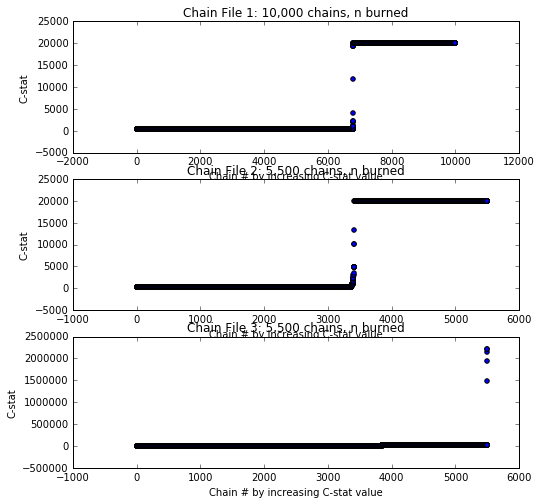

In [36]:
fig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(8,8))

Chain2Plot = Chain1S[:]
x = np.arange(1,len(Chain2Plot.FIT_STATISTIC)+1, 1)
y = Chain2Plot.FIT_STATISTIC
ax1.scatter(x,y)
ax1.set_xlabel("Chain # by increasing C-stat value")
ax1.set_ylabel("C-stat")
ax1.set_title("Chain File 1: 10,000 chains, n burned")

Chain2Plot = Chain2S[:]
x = np.arange(1,len(Chain2Plot.FIT_STATISTIC)+1, 1)
y = Chain2Plot.FIT_STATISTIC
ax2.scatter(x,y)
ax2.set_xlabel("Chain # by increasing C-stat value")
ax2.set_ylabel("C-stat")
ax2.set_title("Chain File 2: 5,500 chains, n burned")

Chain2Plot = Chain3S[:]
x = np.arange(1,len(Chain2Plot.FIT_STATISTIC)+1, 1)
y = Chain2Plot.FIT_STATISTIC
ax3.scatter(x,y)
ax3.set_xlabel("Chain # by increasing C-stat value")
ax3.set_ylabel("C-stat")
ax3.set_title("Chain File 3: 5,500 chains, n burned")

#### At first glance of the plots, we can see that there are too many chains with too high of C-stat values, and therefore low likelihoods.  We only want the ones within reason and close to the lowest C-stat value around 300.

#### The chains with extrememly large C-stat values have very extreme parameter values as well, and therefore unrealistic errors would be calculated.  We need to cut these down to a reasonable C-stat values to get reasonable error bars.

### Lets look at what happens when we slice them to the best C-stat values by eye.

plt.subplots(nrows, ncols) 

    subplots(nrows, ncols, sharex, sharey, squeeze, subplot_kw, gridspec_kw, **kwargs)

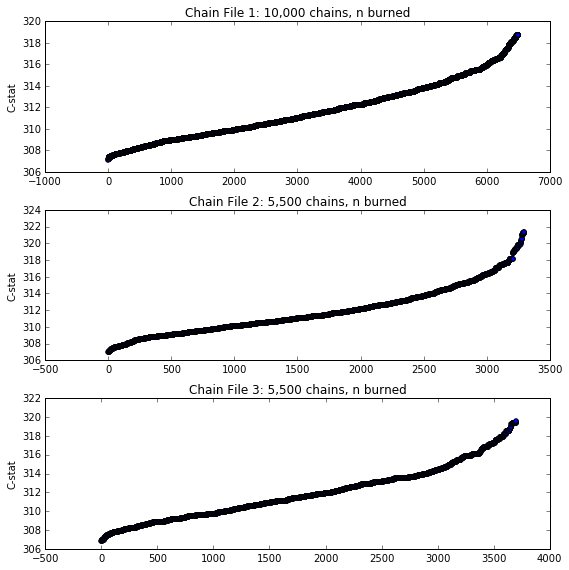

In [37]:
fig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(8,8))

Chain2Plot = Chain1S[:6500]
x = np.arange(1,len(Chain2Plot.FIT_STATISTIC)+1, 1)
y = Chain2Plot.FIT_STATISTIC
ax1.scatter(x,y)
#ax1.set_xlabel("Chain # by increasing C-stat value")
ax1.set_ylabel("C-stat")
ax1.set_title("Chain File 1: 10,000 chains, n burned")

Chain2Plot = Chain2S[:3300]
x = np.arange(1,len(Chain2Plot.FIT_STATISTIC)+1, 1)
y = Chain2Plot.FIT_STATISTIC
ax2.scatter(x,y)
#ax2.set_xlabel("Chain # by increasing C-stat value")
ax2.set_ylabel("C-stat")
ax2.set_title("Chain File 2: 5,500 chains, n burned")

Chain2Plot = Chain3S[:3700]
x = np.arange(1,len(Chain2Plot.FIT_STATISTIC)+1, 1)
y = Chain2Plot.FIT_STATISTIC
ax3.scatter(x,y)
#ax3.set_xlabel("Chain # by increasing C-stat value")
ax3.set_ylabel("C-stat")#
ax3.set_title("Chain File 3: 5,500 chains, n burned")
fig.tight_layout()

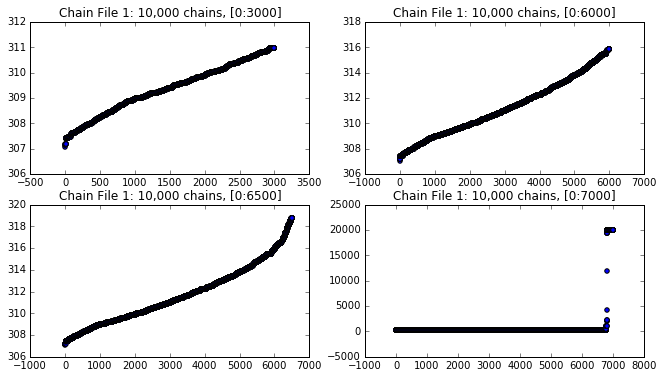

In [38]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(11,6))

Chain2Plot = Chain1S[0:3000]
x = np.arange(1,len(Chain2Plot.FIT_STATISTIC)+1, 1)
y = Chain2Plot.FIT_STATISTIC
ax1.scatter(x,y)
ax1.set_title("Chain File 1: 10,000 chains, [0:3000]")

Chain2Plot = Chain1S[0:6000]
x = np.arange(1,len(Chain2Plot.FIT_STATISTIC)+1, 1)
y = Chain2Plot.FIT_STATISTIC
ax2.scatter(x,y)
ax2.set_title("Chain File 1: 10,000 chains, [0:6000]")

Chain2Plot = Chain1S[0:6500]
x = np.arange(1,len(Chain2Plot.FIT_STATISTIC)+1, 1)
y = Chain2Plot.FIT_STATISTIC
ax3.scatter(x,y)
ax3.set_title("Chain File 1: 10,000 chains, [0:6500]")

Chain2Plot = Chain1S[0:7000]
x = np.arange(1,len(Chain2Plot.FIT_STATISTIC)+1, 1)
y = Chain2Plot.FIT_STATISTIC
ax4.scatter(x,y)
ax4.set_title("Chain File 1: 10,000 chains, [0:7000]")



### You can easily see that the transition from reasonable to unreasonable C-stat values happens between 6500 and 7000 out of the 10,000 chains.
### We can also see from this that a good cutoff of C-stat by eye would be around 320.

In [39]:
import astroML.density_estimation as ML

In [40]:
Stats1 = Chain1S["FIT_STATISTIC"]

In [41]:
difference = np.diff(Stats1)

Plotting the difference between C-stat values to find where the C-stat values drastically change (spikes).

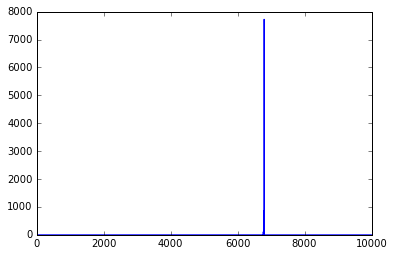

In [42]:
plt.plot(difference)

In [43]:
difference_ = list(difference) # convert to list to get index

In [44]:
max_diff = max(difference_); max_diff

7725.0338233316279

In [45]:
loc_of_max_diff = difference_.index(max_diff); loc_of_max_diff

6792

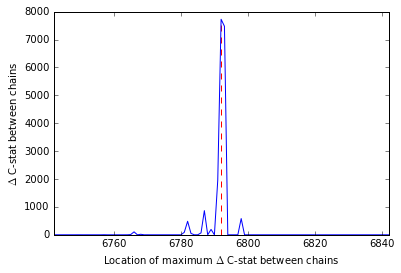

In [46]:
# zooming in around 6792
plt.plot(difference)
plt.xlim(loc_of_max_diff-50, loc_of_max_diff+50)
plt.ylabel("$\Delta$ C-stat between chains")
plt.xlabel("Location of maximum $\Delta$ C-stat between chains")
plt.vlines(x=loc_of_max_diff, ymin=0, ymax= max_diff+20, color='red', linestyle='--')

This is the C-stat value at the location of the maximum difference:

In [47]:
stats1 = list(Stats1)
stats1[loc_of_max_diff] 

4171.683219849142

In [48]:
Chain1S[loc_of_max_diff-20 : loc_of_max_diff]

alpha__1   beta__2      tem__3   norm__4  plIndex__5   norm__6  \
2294 -0.844040 -2.251582  326.982546  0.019400   -2.115054  0.000875   
2234 -0.844040 -2.251582  326.982546  0.019400   -2.115054  0.000875   
2284 -0.844040 -2.251582  326.982546  0.019400   -2.115054  0.000875   
2204 -0.844040 -2.251582  326.982546  0.019400   -2.115054  0.000875   
2274 -0.844040 -2.251582  326.982546  0.019400   -2.115054  0.000875   
2254 -0.844040 -2.251582  326.982546  0.019400   -2.115054  0.000875   
2304 -0.844040 -2.251582  326.982546  0.019400   -2.115054  0.000875   
2264 -0.844040 -2.251582  326.982546  0.019400   -2.115054  0.000875   
2224 -0.844040 -2.251582  326.982546  0.019400   -2.115054  0.000875   
2214 -0.844040 -2.251582  326.982546  0.019400   -2.115054  0.000875   
2174 -0.844897 -2.275833  332.160647  0.019722   -2.136920  0.000889   
2164 -0.881266 -2.368478  339.973755  0.020455   -2.184070  0.000913   
2154 -0.881741 -2.375629  341.455001  0.020547   -2.190393  0.000917   
2144 -0.881741 -2.375629  341.455001  0.020547   -2.190393  0.000917   
2134 -0.881741 -2.375629  341.455001  0.020547   -2.190393  0.000917   
2124 -0.886099 -2.386056  342.512714  0.020630   -2.195953  0.000919   
2114 -0.947486 -2.481291  361.555425  0.021240   -2.276890  0.000902   
2104 -0.947486 -2.481291  361.555425  0.021240   -2.276890  0.000902   
2094 -0.895767 -1.968473  255.869103  0.014855   -1.825520  0.000631   
2084 -0.895767 -1.968473  255.869103  0.014855   -1.825520  0.000631   

      FIT_STATISTIC  
2294     466.748253  
2234     466.748253  
2284     466.748253  
2204     466.748253  
2274     466.748253  
2254     466.748253  
2304     466.748253  
2264     466.748253  
2224     466.748253  
2214     466.748253  
2174     555.445809  
2164    1039.383939  
2154    1089.235203  
2144    1089.235203  
2134    1089.235203  
2124    1156.673495  
2114    2022.644349  
2104    2022.644349  
2094    2215.744699  
2084    2215.744699

In [49]:
Stats1[loc_of_max_diff-20 : loc_of_max_diff]

2294     466.748253
2234     466.748253
2284     466.748253
2204     466.748253
2274     466.748253
2254     466.748253
2304     466.748253
2264     466.748253
2224     466.748253
2214     466.748253
2174     555.445809
2164    1039.383939
2154    1089.235203
2144    1089.235203
2134    1089.235203
2124    1156.673495
2114    2022.644349
2104    2022.644349
2094    2215.744699
2084    2215.744699
Name: FIT_STATISTIC, dtype: float64

### If you continue on with this method and slice the chain data near where the maximum difference occurs, you will see that it's still not enough.  We'd like the maximum C-stat value we include in the error analysis to be closer to 400. 

In [50]:
mean_near_max = np.mean(difference[loc_of_max_diff-50 : loc_of_max_diff+50])
mean_near_max

196.28093424377406

### ----> assorted functions, nearest
assortedfunctions is a package I made for functions I often need that are not built-into python.  
I will import nearest, which finds the nearest value in an array to a number you provide.
It returns the location of the nearest value and the value of it.

In [51]:
import assortedfunctions
from assortedfunctions import nearest

In [52]:
help(nearest)

Help on function nearest in module assortedfunctions:

nearest(array, value)
    nearest(array, value)
    
    Returns the index and the value in an array of floats that matches closest to an input value of interest.



In [53]:
n_cut, dummy = nearest(difference, mean_near_max)
n_cut

6789

In [54]:
Chain1S[0 : n_cut]

alpha__1   beta__2      tem__3   norm__4  plIndex__5   norm__6  \
380  -0.730139 -2.178759  293.871104  0.019258   -2.043611  0.001088   
2450 -0.739288 -2.183636  300.301886  0.019166   -2.037493  0.001061   
2460 -0.739288 -2.183636  300.301886  0.019166   -2.037493  0.001061   
2470 -0.739882 -2.184326  301.041748  0.019152   -2.037684  0.001061   
2420 -0.724329 -2.183355  293.736665  0.019229   -2.043159  0.001102   
2440 -0.724329 -2.183355  293.736665  0.019229   -2.043159  0.001102   
2430 -0.724329 -2.183355  293.736665  0.019229   -2.043159  0.001102   
9568 -0.735106 -2.179753  297.695453  0.019227   -2.061632  0.001058   
9558 -0.735106 -2.179753  297.695453  0.019227   -2.061632  0.001058   
559  -0.758979 -2.176577  304.240366  0.019200   -2.053504  0.000956   
4491 -0.734385 -2.176732  293.302655  0.019337   -2.035830  0.001080   
4501 -0.734385 -2.176732  293.302655  0.019337   -2.035830  0.001080   
4351 -0.734385 -2.176732  293.302655  0.019337   -2.035830  0.001080   
4361 -0.734385 -2.176732  293.302655  0.019337   -2.035830  0.001080   
4381 -0.734385 -2.176732  293.302655  0.019337   -2.035830  0.001080   
4391 -0.734385 -2.176732  293.302655  0.019337   -2.035830  0.001080   
4401 -0.734385 -2.176732  293.302655  0.019337   -2.035830  0.001080   
4371 -0.734385 -2.176732  293.302655  0.019337   -2.035830  0.001080   
4421 -0.734385 -2.176732  293.302655  0.019337   -2.035830  0.001080   
4411 -0.734385 -2.176732  293.302655  0.019337   -2.035830  0.001080   
4471 -0.734385 -2.176732  293.302655  0.019337   -2.035830  0.001080   
4461 -0.734385 -2.176732  293.302655  0.019337   -2.035830  0.001080   
4451 -0.734385 -2.176732  293.302655  0.019337   -2.035830  0.001080   
4481 -0.734385 -2.176732  293.302655  0.019337   -2.035830  0.001080   
4441 -0.734385 -2.176732  293.302655  0.019337   -2.035830  0.001080   
4431 -0.734385 -2.176732  293.302655  0.019337   -2.035830  0.001080   
3533 -0.738741 -2.177086  297.894287  0.019082   -2.028802  0.001117   
3523 -0.738741 -2.177086  297.894287  0.019082   -2.028802  0.001117   
3513 -0.738741 -2.177086  297.894287  0.019082   -2.028802  0.001117   
3393 -0.739018 -2.177568  296.159146  0.019174   -2.026525  0.001100   
...        ...       ...         ...       ...         ...       ...   
9940 -0.965422 -2.259397  462.760309  0.017326   -1.829734  0.000659   
9890 -0.965422 -2.259397  462.760309  0.017326   -1.829734  0.000659   
9920 -0.965422 -2.259397  462.760309  0.017326   -1.829734  0.000659   
9930 -0.965422 -2.259397  462.760309  0.017326   -1.829734  0.000659   
9900 -0.965422 -2.259397  462.760309  0.017326   -1.829734  0.000659   
9910 -0.965422 -2.259397  462.760309  0.017326   -1.829734  0.000659   
5033 -0.877426 -2.192115  342.263607  0.019268   -2.084950  0.000544   
2334 -0.788473 -2.207456  311.030249  0.019267   -2.084513  0.000974   
2314 -0.842755 -2.246590  327.924595  0.019350   -2.108484  0.000873   
2324 -0.842755 -2.246590  327.924595  0.019350   -2.108484  0.000873   
2184 -0.843764 -2.251345  326.902387  0.019400   -2.114699  0.000875   
2194 -0.843764 -2.251345  326.902387  0.019400   -2.114699  0.000875   
2244 -0.844040 -2.251582  326.982546  0.019400   -2.115054  0.000875   
2294 -0.844040 -2.251582  326.982546  0.019400   -2.115054  0.000875   
2234 -0.844040 -2.251582  326.982546  0.019400   -2.115054  0.000875   
2284 -0.844040 -2.251582  326.982546  0.019400   -2.115054  0.000875   
2204 -0.844040 -2.251582  326.982546  0.019400   -2.115054  0.000875   
2274 -0.844040 -2.251582  326.982546  0.019400   -2.115054  0.000875   
2254 -0.844040 -2.251582  326.982546  0.019400   -2.115054  0.000875   
2304 -0.844040 -2.251582  326.982546  0.019400   -2.115054  0.000875   
2264 -0.844040 -2.251582  326.982546  0.019400   -2.115054  0.000875   
2224 -0.844040 -2.251582  326.982546  0.019400   -2.115054  0.000875   
2214 -0.844040 -2.251582  326.982546  0.019400   -2.115054  0.000875   
2174 -0.844897 -2.275833  332.160647  0.019722

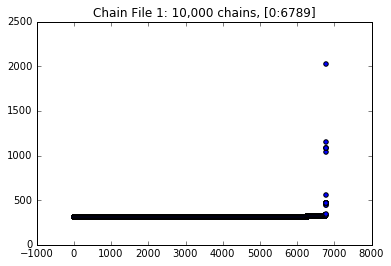

In [55]:
Chain2Plot = Chain1S[0 : n_cut]
x = np.arange(1,len(Chain2Plot.FIT_STATISTIC)+1, 1)
y = Chain2Plot.FIT_STATISTIC
plt.scatter(x,y)
plt.title("Chain File 1: 10,000 chains, [0:%i]"%n_cut)

### You can see that this still is not enough.  And this is not very objective way of cutting down the chains.

## Now we will plot the parameters against themselves and against the C-stat values.

## -----> Programs for plotting.

In [56]:
def plot_conditional(data, dim1, dim2, **kwargs):
    xvalue = data[data.columns[dim1]]
    yvalue = data[data.columns[dim2]]
    return plt.hexbin(x = xvalue, y = yvalue, reduce_C_function=np.nansum,**kwargs)

In [57]:
def fit_statistics(data, dim1, **kwargs):
    xvalue = data[data.columns[dim1]]
    yvalue = data.FIT_STATISTIC
    return plt.hexbin(x = xvalue, y = yvalue, reduce_C_function=np.nansum,**kwargs)

## Filtered out to subjective n_cut.

In [58]:
# cut the data down to where our method says to cut it.
Chain1SC = Chain1S[0 : n_cut]

In [ ]:
npars = len(Chain1SC.columns) - 1  # number of parameters for model. Last column is C-stat values.
data = Chain1SC # sliced data
parnames = data.columns[0:-1] # parameter names for model.

plt.figure(figsize=(5*npars, 5*npars))
for i in range(npars):  # i in the parameter on the y-axis of each row.
    for j in range(i): # j is the next parameter in array that will be on the x-axis.
        plt.subplot(npars, npars, npars * (j + 1) + i + 1)
        plot_conditional(data, i, j, bins='log', gridsize=40, cmap = plt.cm.Blues)
        plt.xlabel(parnames[i])
        plt.ylabel(parnames[j])
plt.tight_layout()

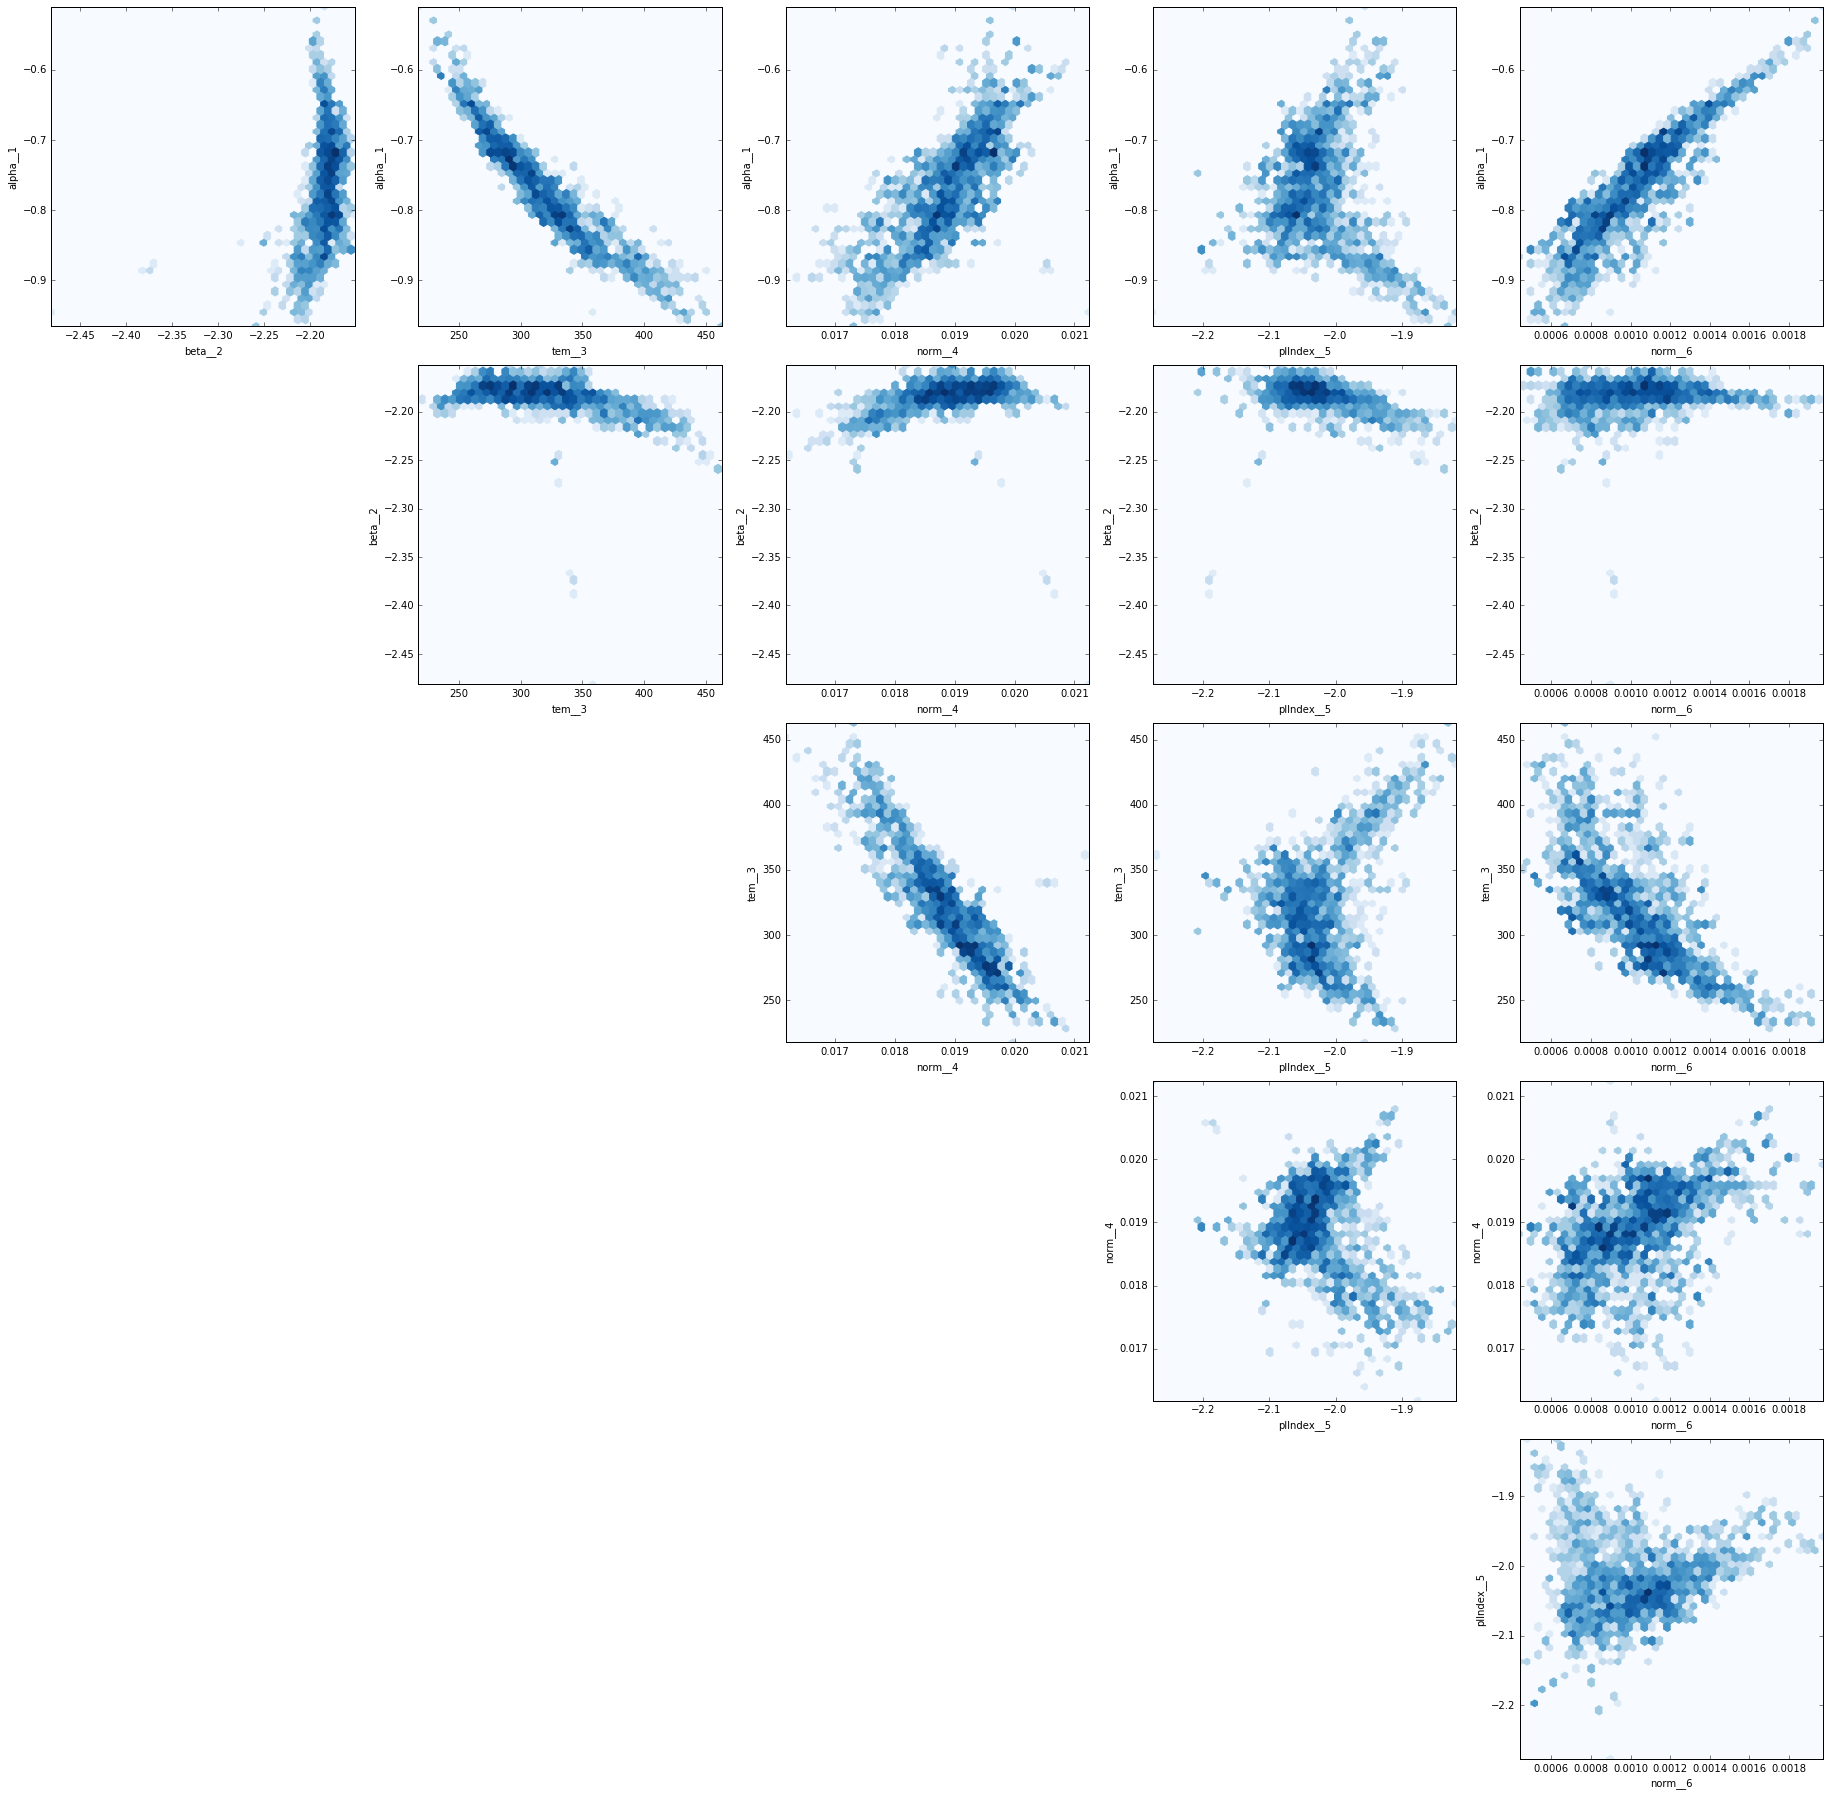

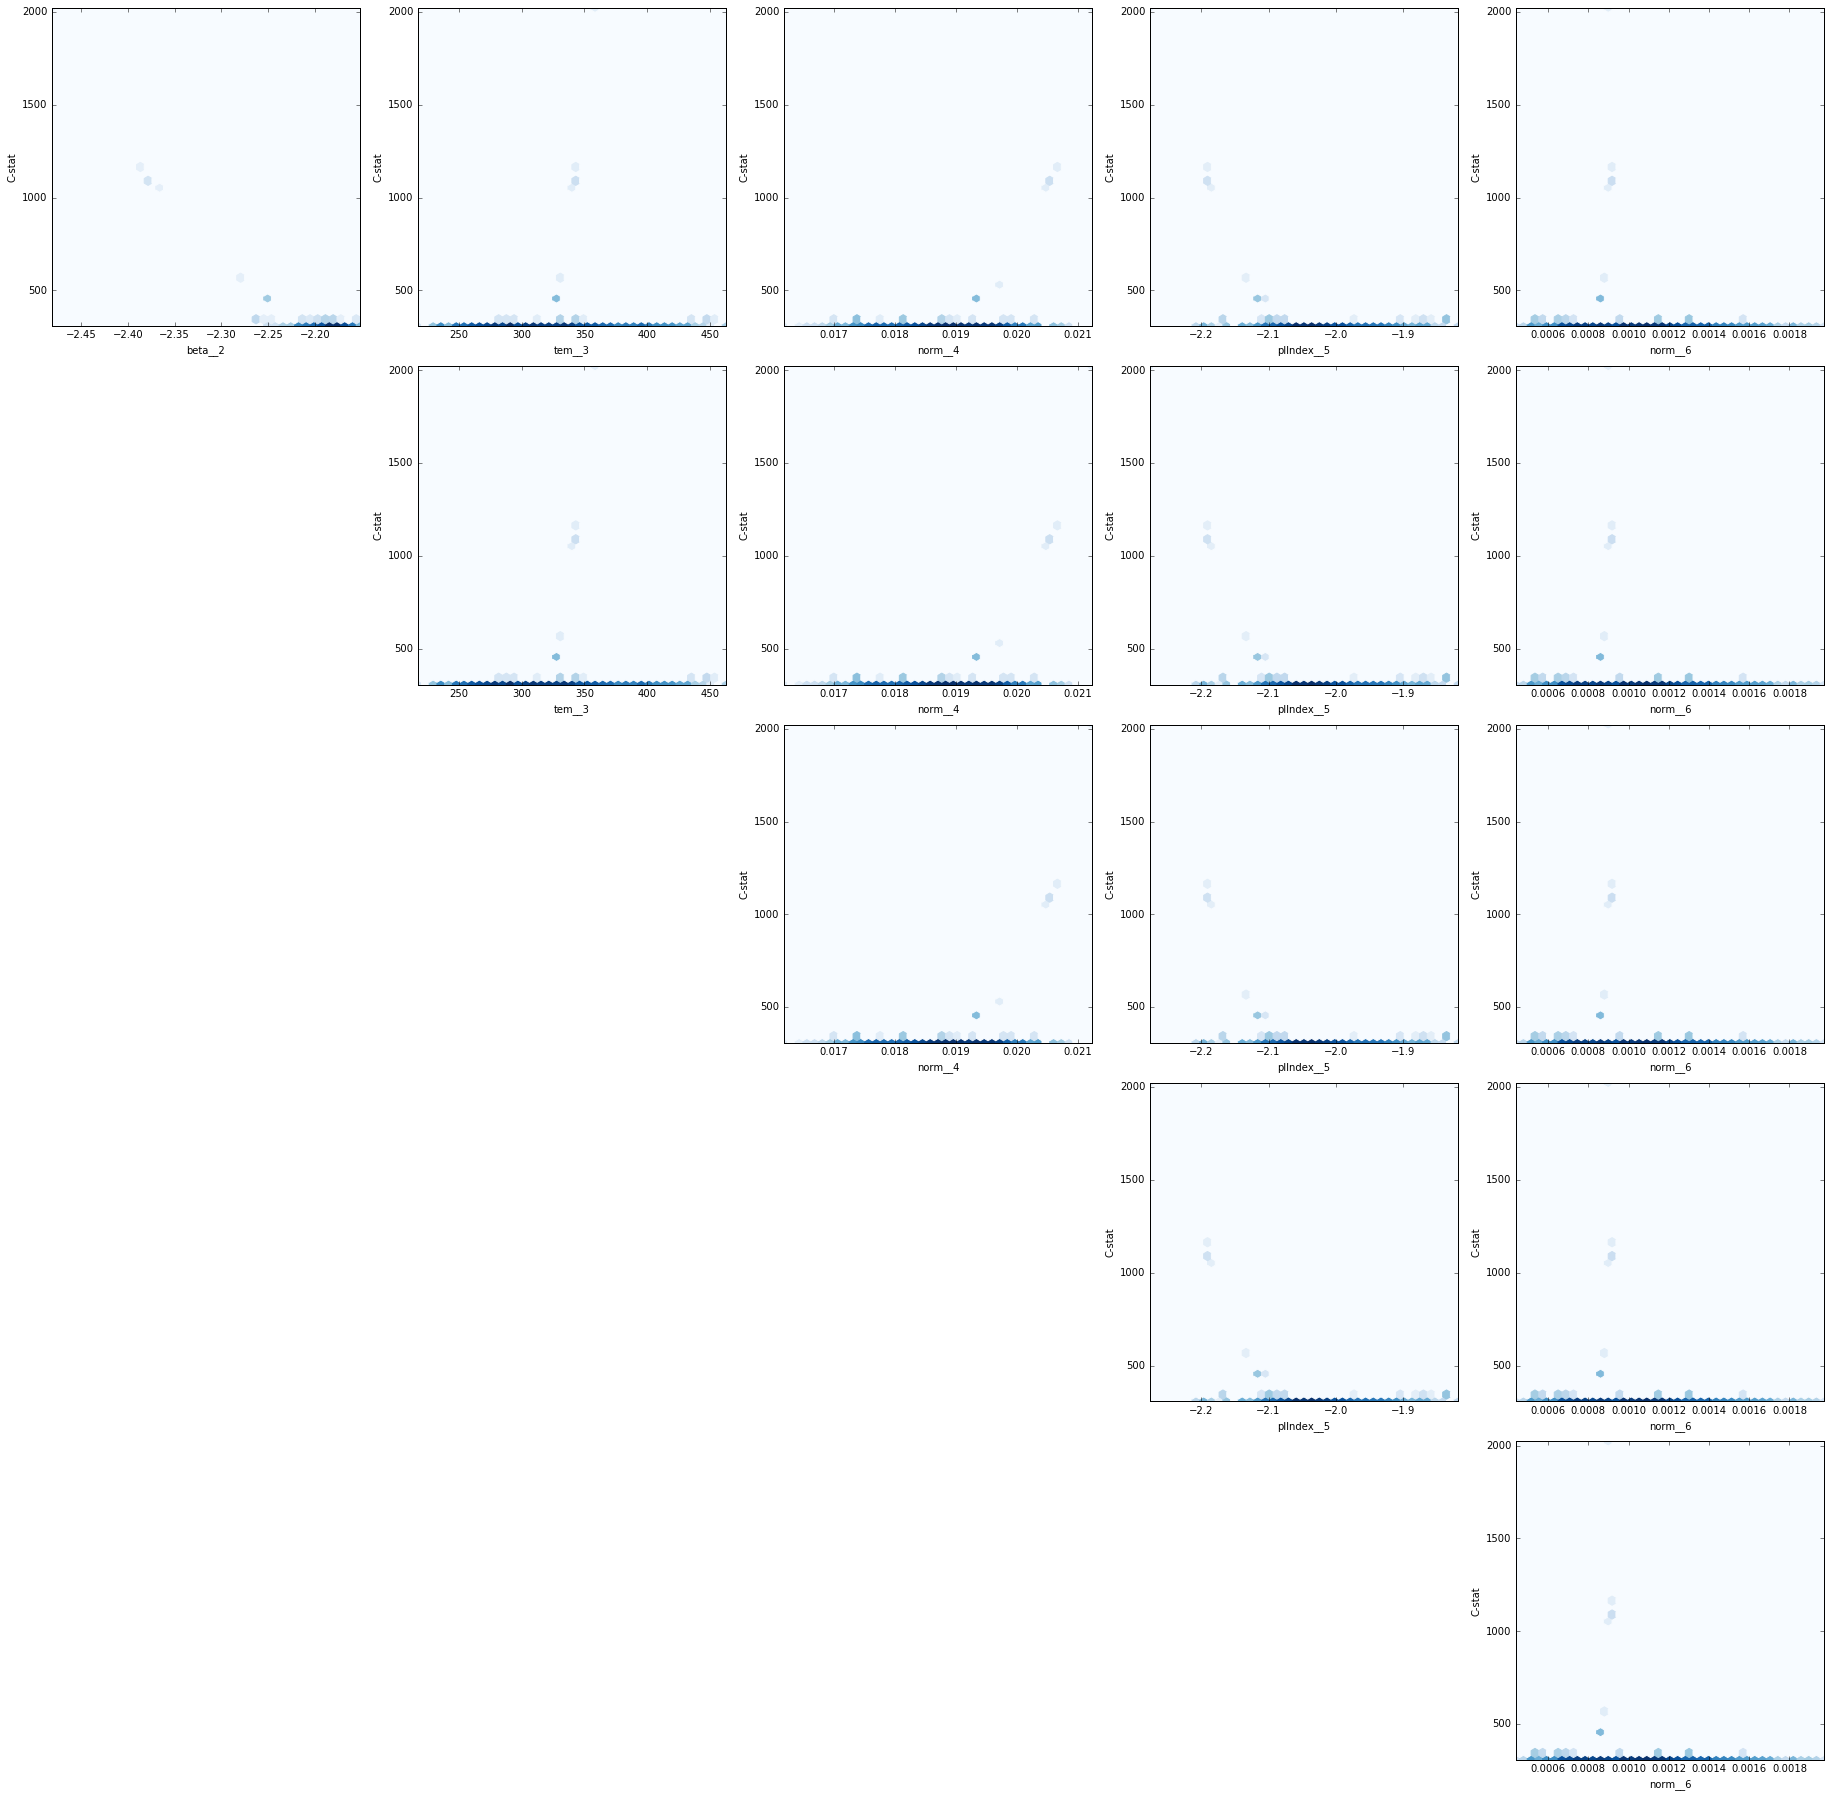

In [59]:
npars = len(Chain1SC.columns) - 1
data = Chain1SC
parnames = data.columns[0:-1]

plt.figure(figsize=(5*npars, 5*npars))
for i in range(npars):
    for j in range(i):
        plt.subplot(npars, npars, npars * (j + 1) + i + 1)
        fit_statistics(data, i, bins='log', gridsize=40, cmap = plt.cm.Blues)
        plt.xlabel(parnames[i])
        plt.ylabel("C-stat")
plt.tight_layout()

## Filtered out to subjective n_cut - 100 chains with lower C-stat values.

In [61]:
Chain1SC = Chain1S[0 : n_cut-100]

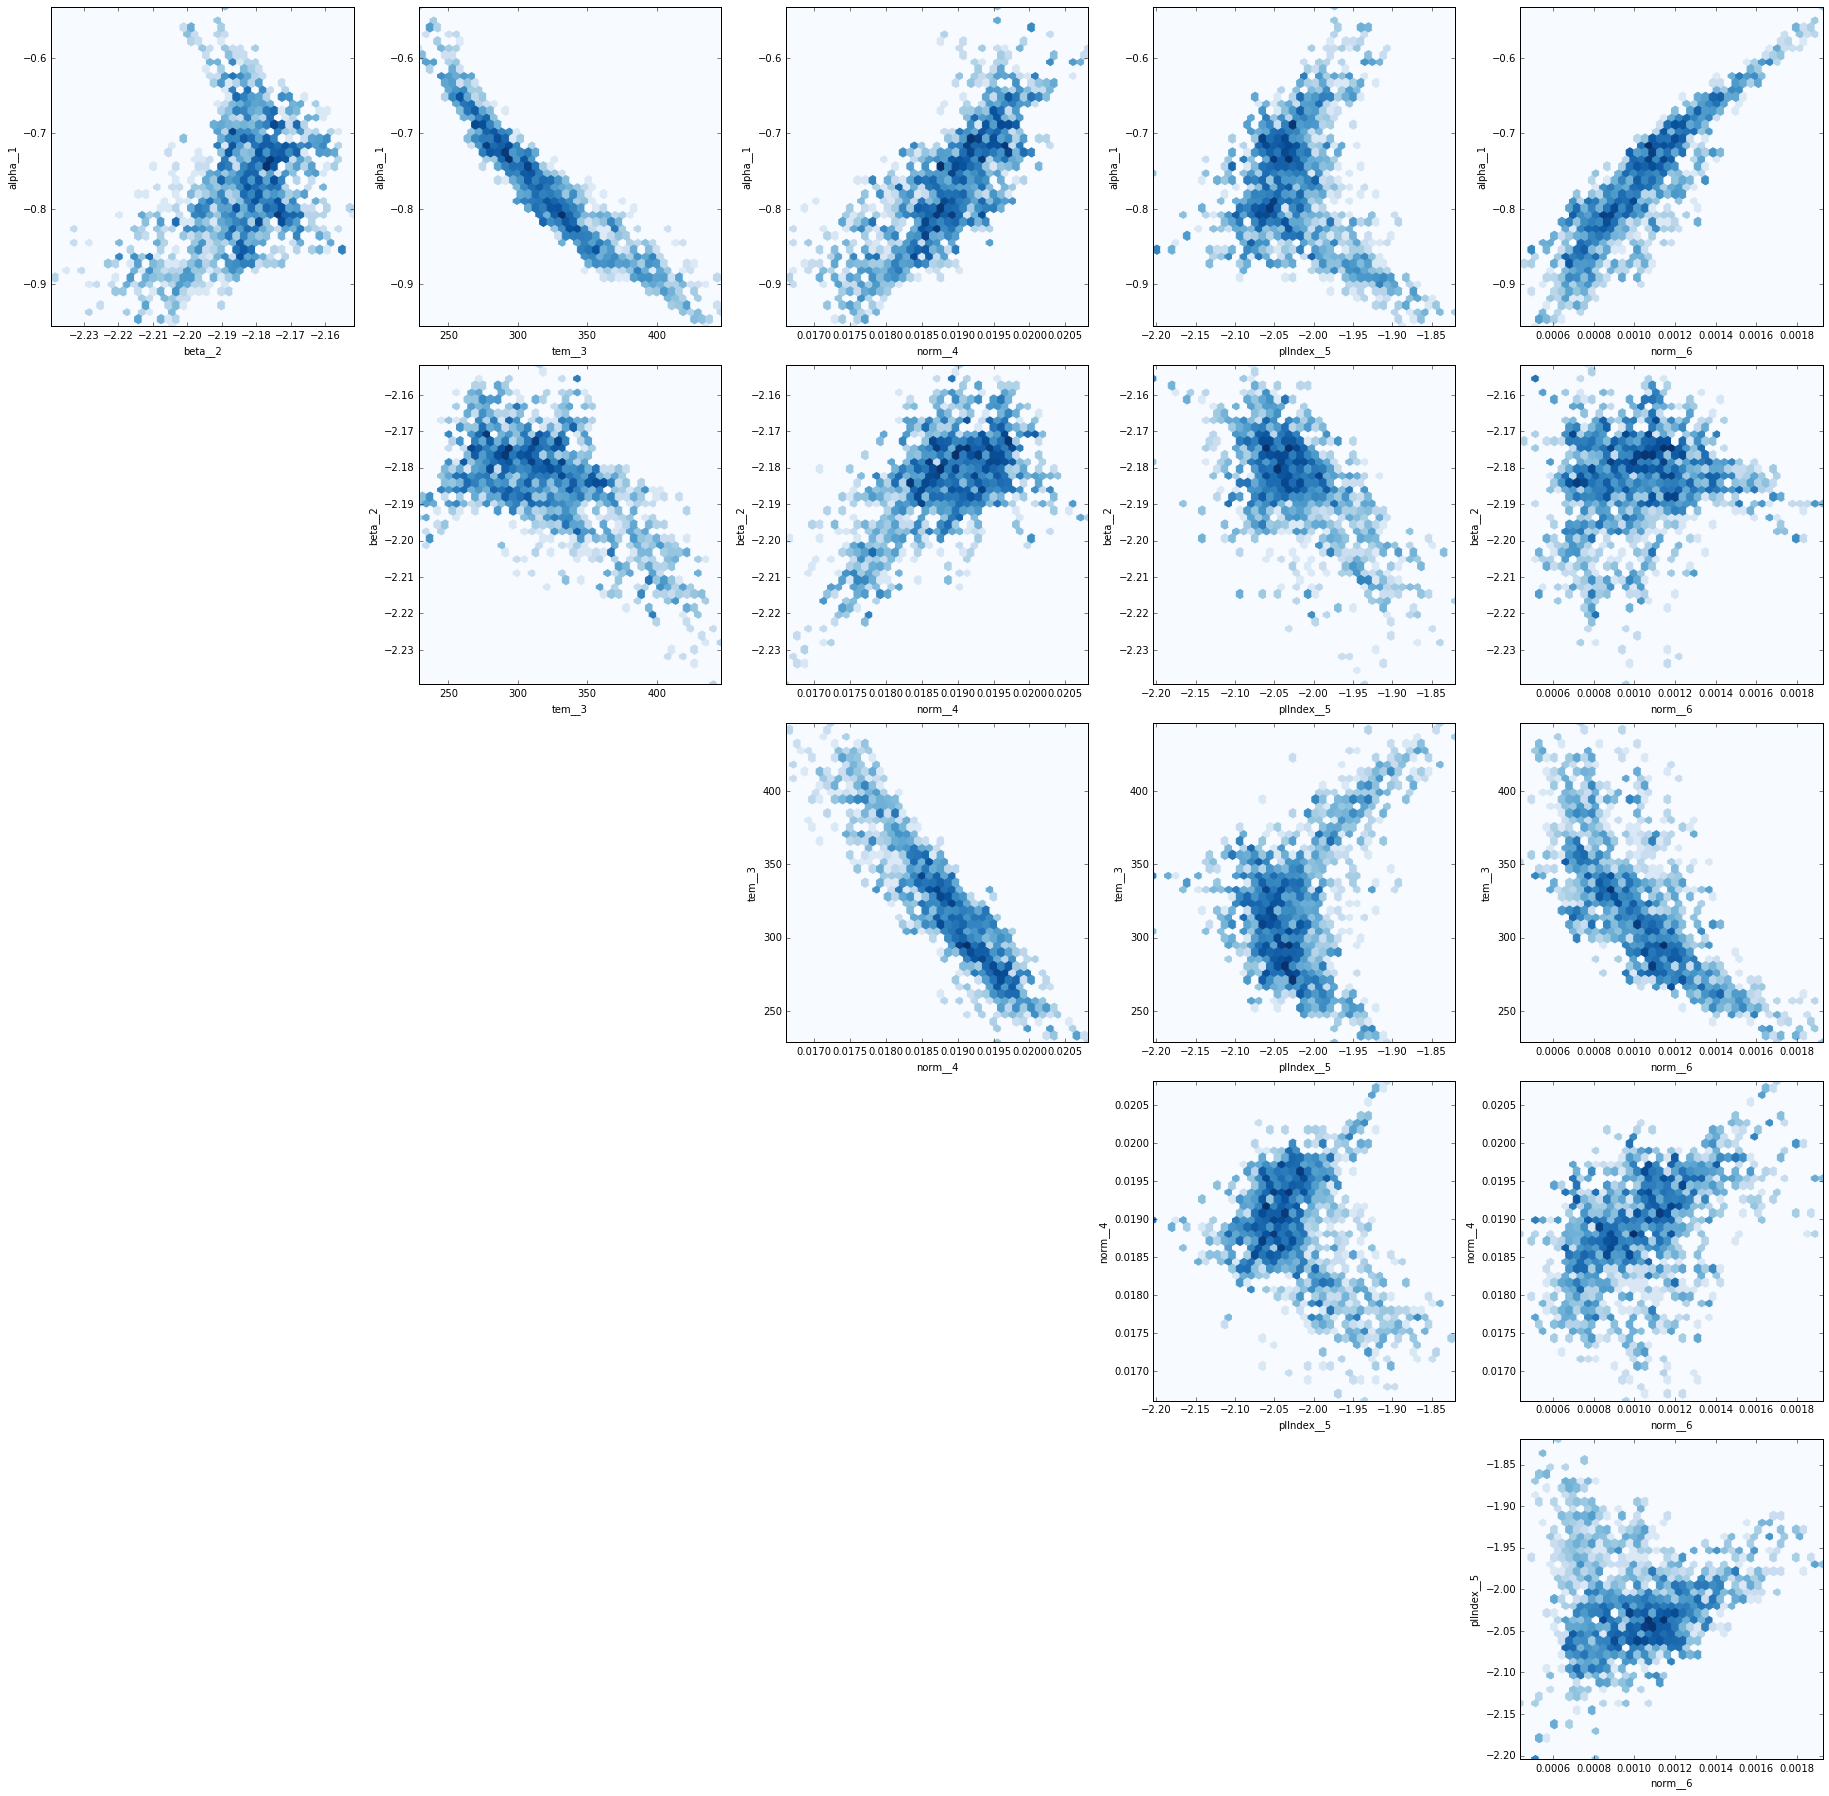

In [62]:
npars = len(Chain1SC.columns) - 1  # number of parameters for model. Last column is C-stat values.
data = Chain1SC # sliced data
parnames = data.columns[0:-1] # parameter names for model.

plt.figure(figsize=(5*npars, 5*npars))
for i in range(npars):  # i in the parameter on the y-axis of each row.
    for j in range(i): # j is the next parameter in array that will be on the x-axis.
        plt.subplot(npars, npars, npars * (j + 1) + i + 1)
        plot_conditional(data, i, j, bins='log', gridsize=40, cmap = plt.cm.Blues)
        plt.xlabel(parnames[i])
        plt.ylabel(parnames[j])
plt.tight_layout()

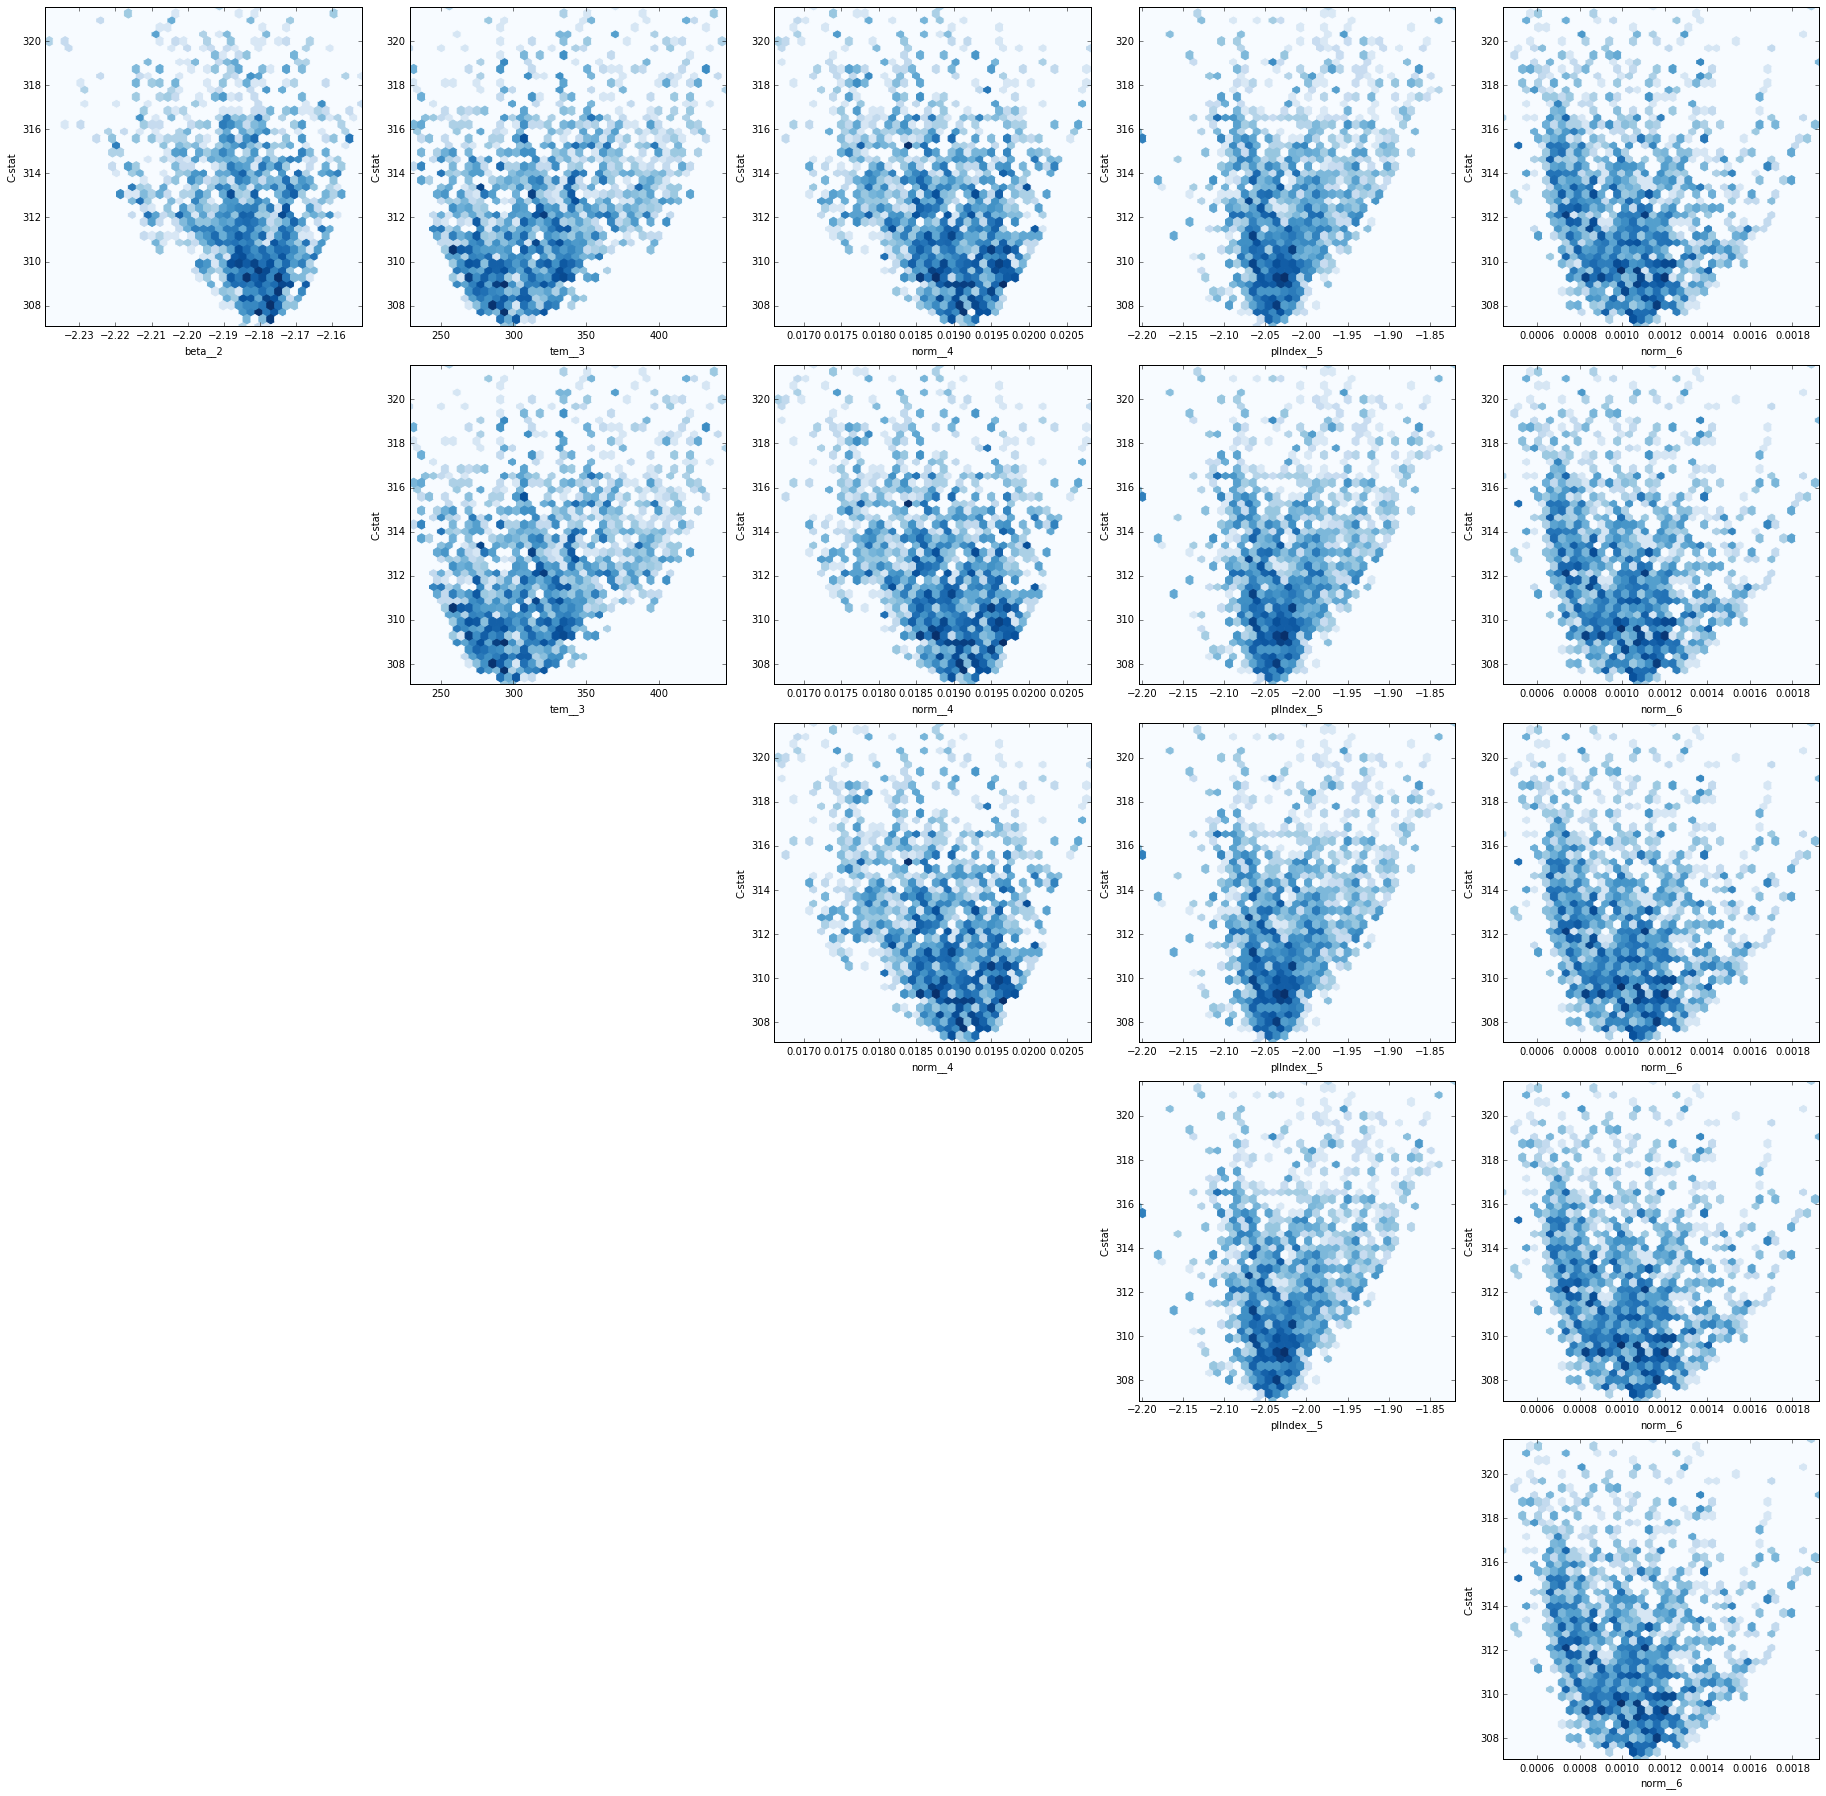

In [63]:
npars = len(Chain1SC.columns) - 1
data = Chain1SC
parnames = data.columns[0:-1]

plt.figure(figsize=(5*npars, 5*npars))
for i in range(npars):
    for j in range(i):
        plt.subplot(npars, npars, npars * (j + 1) + i + 1)
        fit_statistics(data, i, bins='log', gridsize=40, cmap = plt.cm.Blues)
        plt.xlabel(parnames[i])
        plt.ylabel("C-stat")
plt.tight_layout()

## Filtered out to subjective n_cut - 500 chains with lower C-stat values.

In [64]:
Chain1SC = Chain1S[0 : n_cut-500]

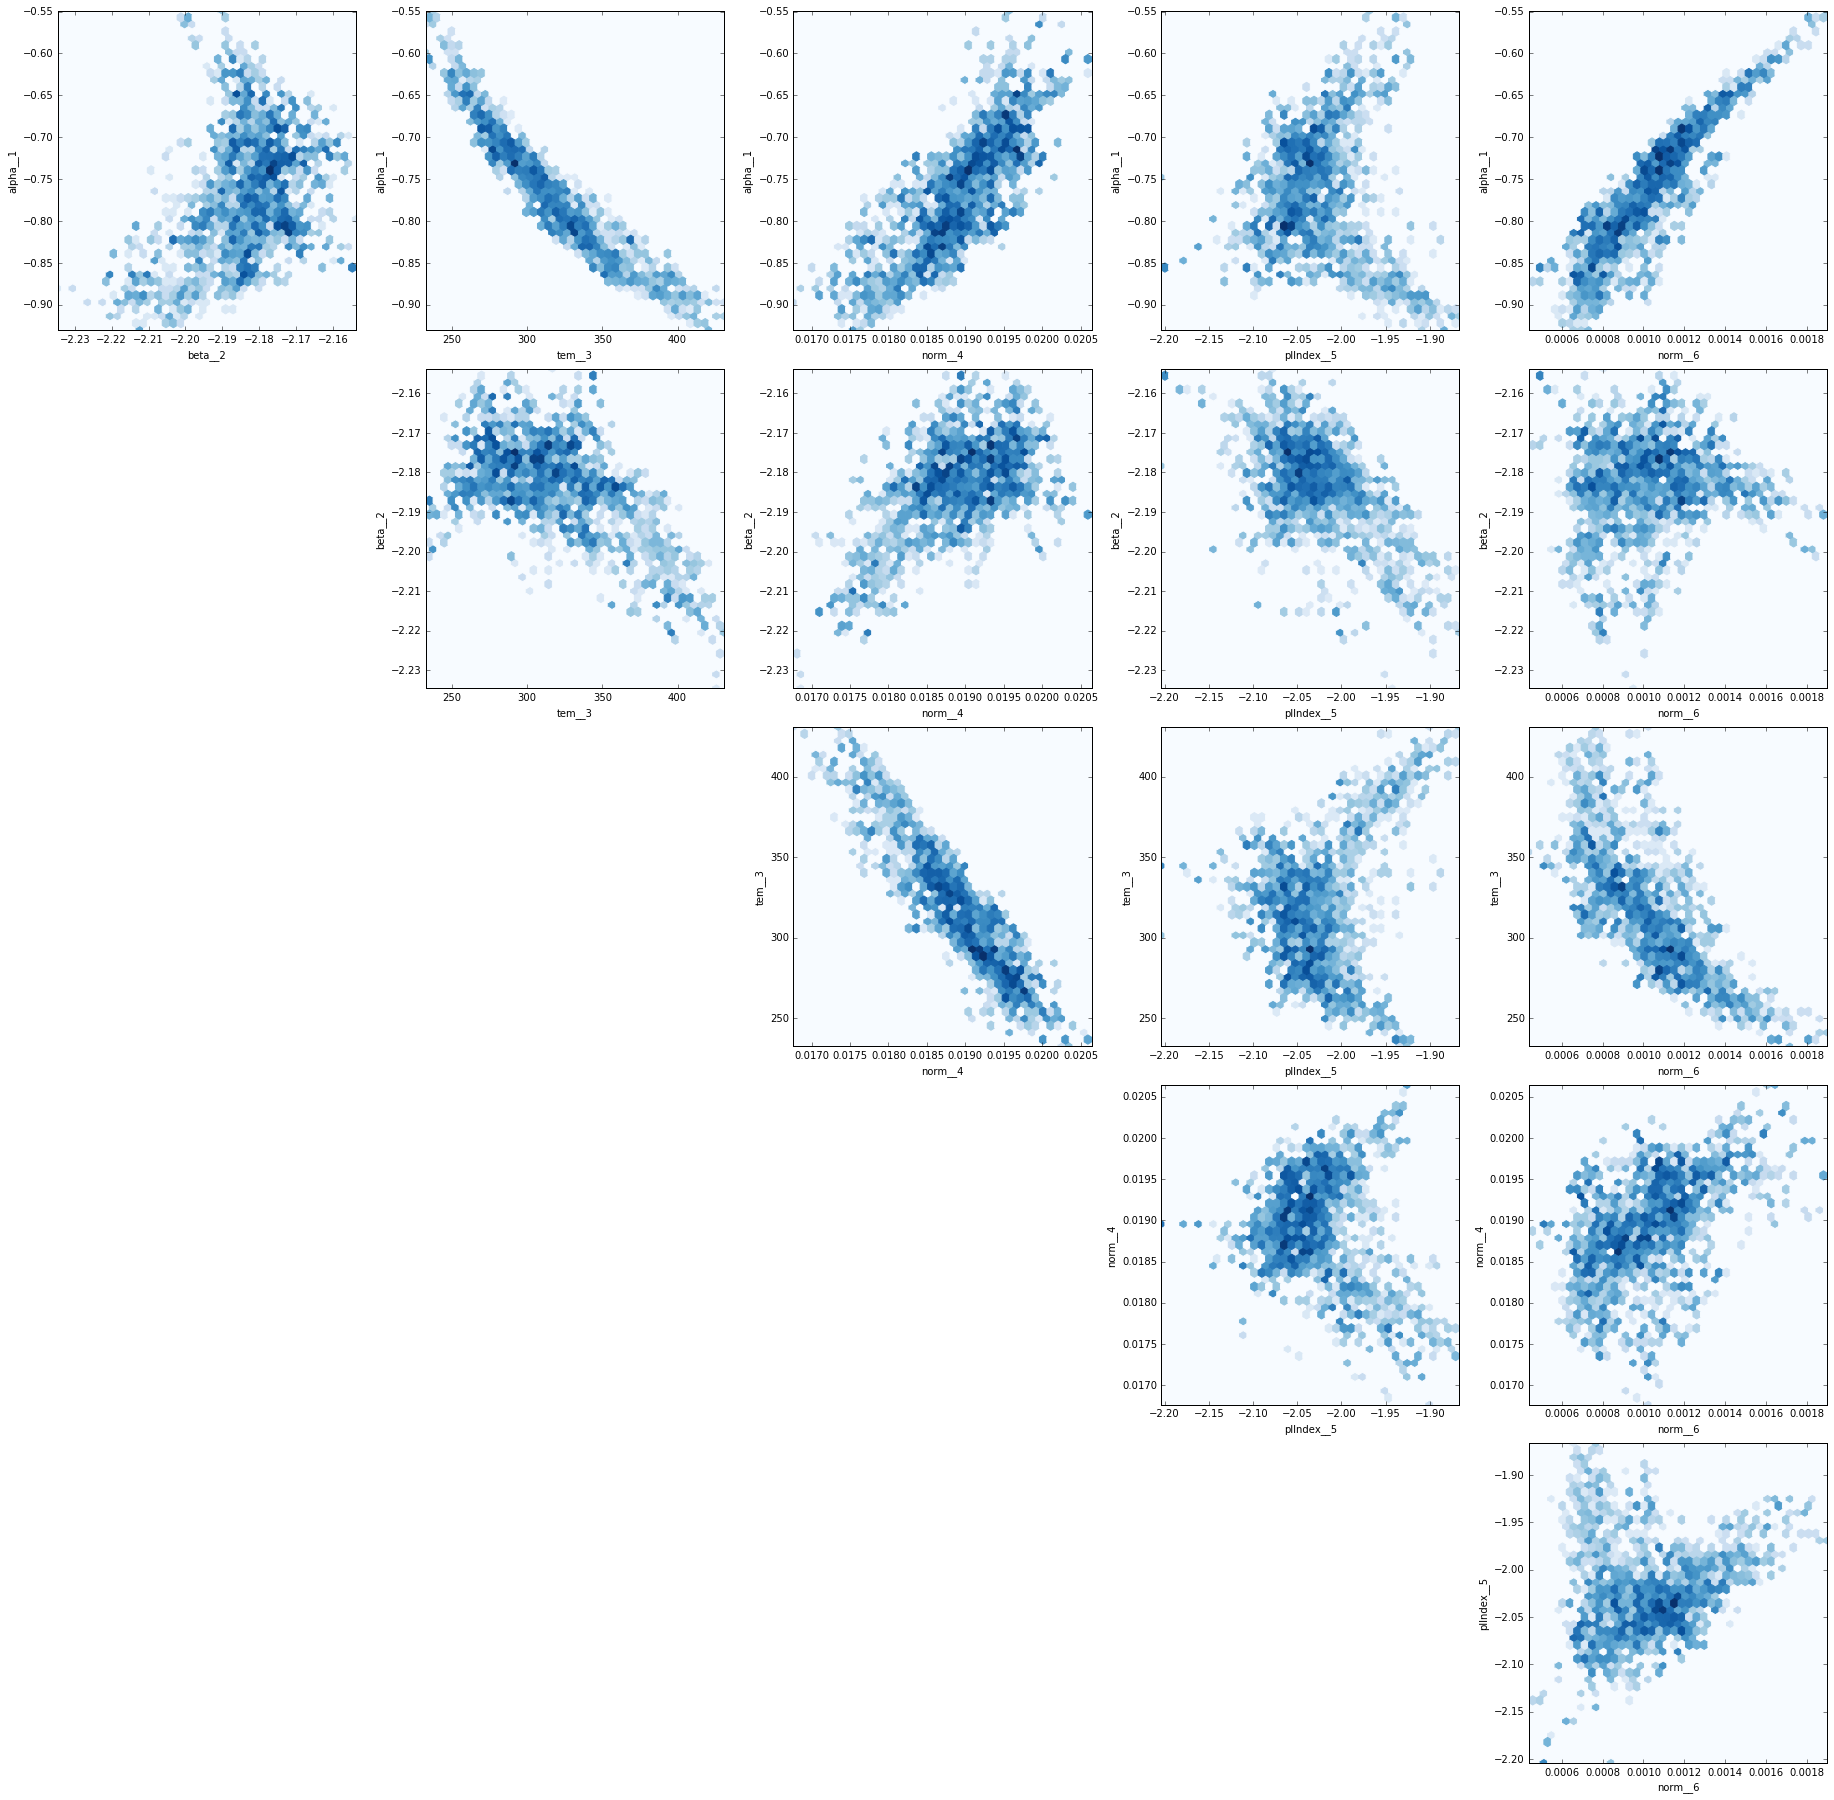

In [65]:
npars = len(Chain1SC.columns) - 1  # number of parameters for model. Last column is C-stat values.
data = Chain1SC # sliced data
parnames = data.columns[0:-1] # parameter names for model.

plt.figure(figsize=(5*npars, 5*npars))
for i in range(npars):  # i in the parameter on the y-axis of each row.
    for j in range(i): # j is the next parameter in array that will be on the x-axis.
        plt.subplot(npars, npars, npars * (j + 1) + i + 1)
        plot_conditional(data, i, j, bins='log', gridsize=40, cmap = plt.cm.Blues)
        plt.xlabel(parnames[i])
        plt.ylabel(parnames[j])
plt.tight_layout()

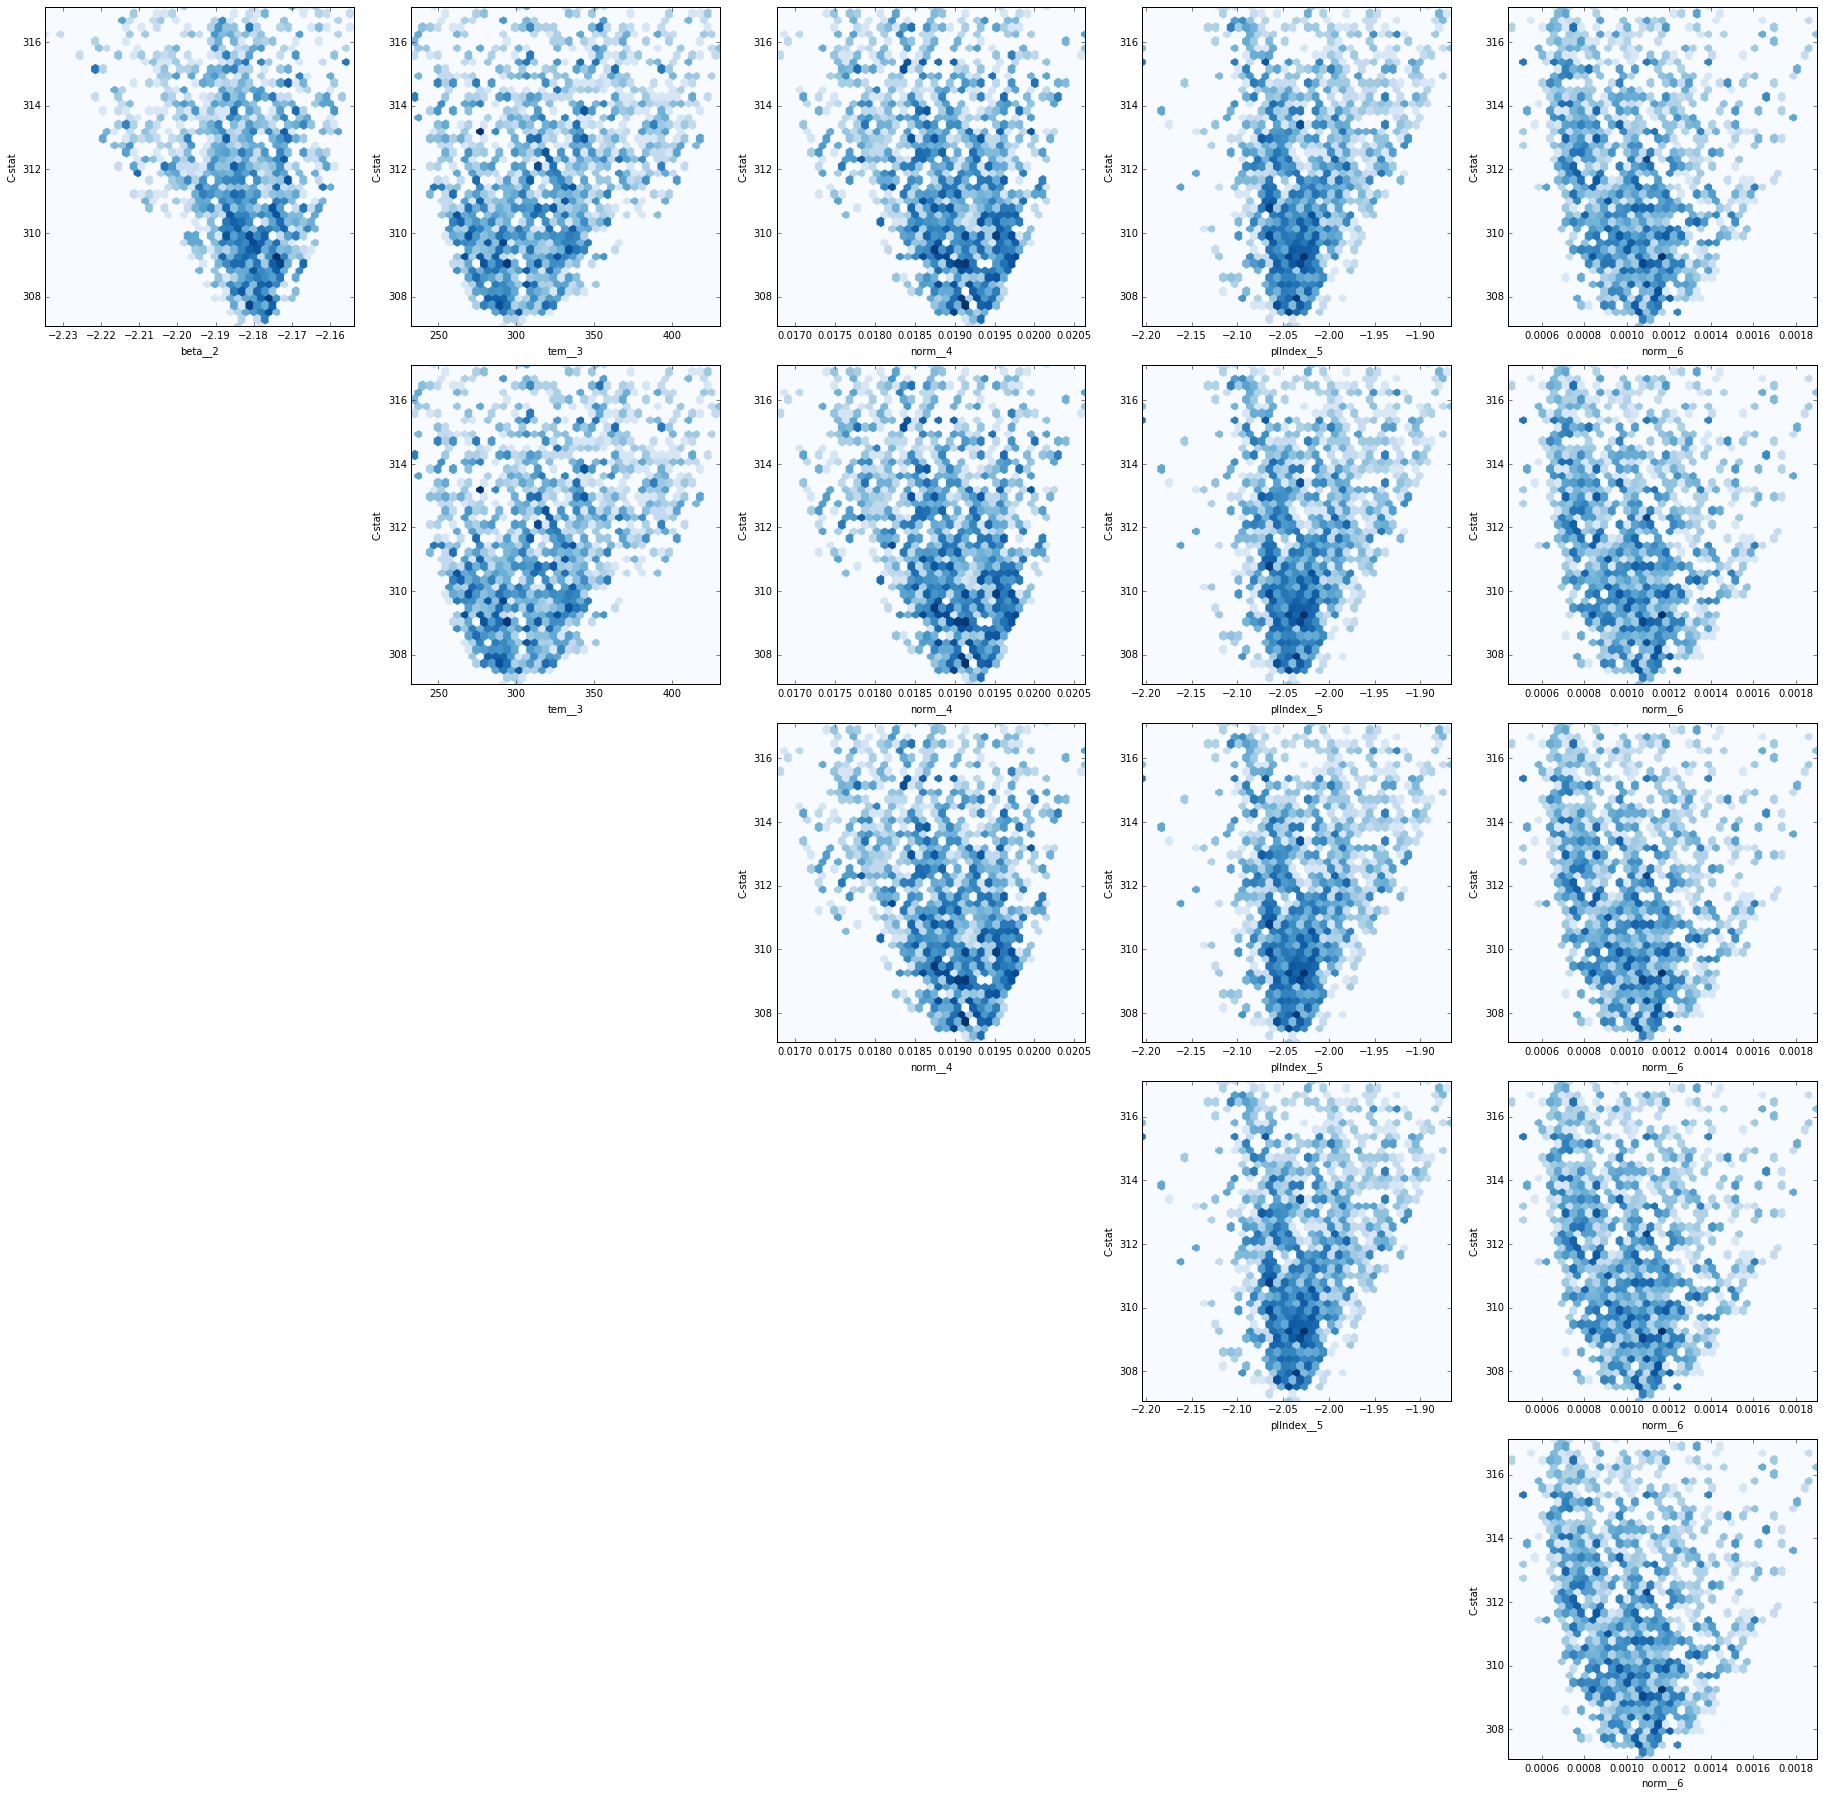

In [66]:
npars = len(Chain1SC.columns) - 1
data = Chain1SC
parnames = data.columns[0:-1]

plt.figure(figsize=(5*npars, 5*npars))
for i in range(npars):
    for j in range(i):
        plt.subplot(npars, npars, npars * (j + 1) + i + 1)
        fit_statistics(data, i, bins='log', gridsize=40, cmap = plt.cm.Blues)
        plt.xlabel(parnames[i])
        plt.ylabel("C-stat")
plt.tight_layout()

## SEE THE XSPEC_MCMCchain_slicing_Objectivve_Method 
### to see how we apply Bayesian Blocks to determine where we should slice the chains.

### I will not continue on with the other two Chain files in this program because it is easy to see that the selection to take the mean of +- 50 chains and to slice at +- N chains is very subjective and won't be consistent with chains of different length.  For example, 100 chains might not be enough for a chain file with length 10,000 but too man for a chain file length of 1,000.